In [98]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score

In [99]:
# !pip install librosa

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
filename='Cuckoo_mono/Guira_Cuckoo/Guira_Cuckoo001.wav'

In [102]:
import IPython.display as ipd
import librosa
import librosa.display

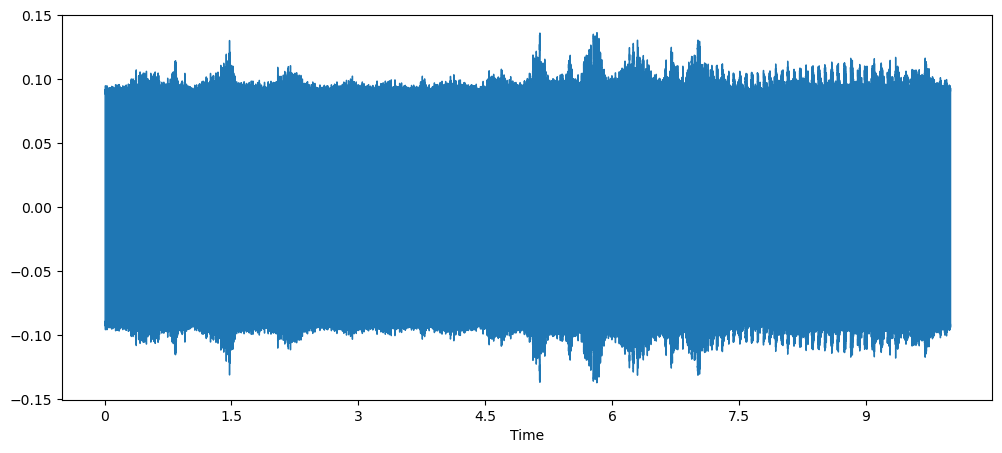

In [103]:
#Guira Cuckoo Sound
plt.figure(figsize=(12,5))
data,sample_rate=librosa.load(filename,sr=16000)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [104]:
sample_rate #Sample rate how many times per second sound is sampled
#librosa will read audio file and convert to audio file into sample rate of 22050
#librosa convert the stereo sound to mono and normalize the data within range

16000

In [105]:
#Stereo: different sound on rhs and lhs and thus convert it to mono

In [106]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio=wav.read(filename)

In [107]:
wave_sample_rate

16000

In [108]:
wave_audio # 2 channels stereo sound through scipy.io

array([2764, 2838, 2724, ..., 2985, 2681, 2895], dtype=int16)

In [109]:
data # 1 channel mono through librosa

array([0.08435059, 0.08660889, 0.08312988, ..., 0.09109497, 0.08181763,
       0.08834839], dtype=float32)

In [110]:
import os
import pathlib
import tensorflow as tf

# Feature Extraction

Mel-Frequency Cepstral Coefficients(MFCC): Summarizes the frequency distribution across the window size so that it is possible to analyze bothe the frquency and time characteristics of the sound ; allow us to identify features for classification

In [111]:
mfcc=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40) #40 parameters
print(mfcc.shape)

(40, 313)


In [112]:
mfcc # Patterns that have been extracted based on the frequency and time characteristics
# Uniquely identifies the particular audio signal in which class it actually belongs

array([[-2.6955151e+02, -3.0899207e+02, -3.8175919e+02, ...,
        -3.4906921e+02, -3.3031885e+02, -2.6944815e+02],
       [ 8.5867836e+01,  6.1600342e+01, -4.1128902e+00, ...,
         2.3989787e+00,  2.3412363e+01,  7.3535477e+01],
       [ 3.2568386e+01,  4.0021767e+01,  1.5254021e+01, ...,
        -7.9936399e+00,  1.9896656e+01,  3.6569355e+01],
       ...,
       [ 2.6860213e+00,  3.5673177e+00,  1.6862919e+00, ...,
         1.9524369e+00, -7.2761536e-01,  2.0729505e-02],
       [ 9.5145023e-01,  7.4196374e-01,  3.7652388e+00, ...,
         7.3252411e+00,  6.1349020e+00,  2.9265602e+00],
       [ 1.7299161e+00,  2.6779673e+00,  6.5359697e+00, ...,
        -1.6846528e+00,  6.8176162e-01,  5.2743071e-01]], dtype=float32)

In [113]:
# Folder Structure
data_dir = 'Cuckoo_mono'
classes = np.array(tf.io.gfile.listdir(str(data_dir)))
print('Species:', classes)

Species: ['Asian_Koel' 'Black_Cuckoo' 'Common Cuckoo' 'Greater_Coucal'
 'Great_Spotted_Cuckoo' 'Guira_Cuckoo' 'Indian_Cuckoo' 'Pacific_Koel'
 'Pheasant_Cuckoo' 'Striped_Cuckoo']


In [114]:
#Extacting MFCC's for every audio file
def load_and_feature_extract(data_dir, classes, target_shape=(128, 128)):
    data=[]
    labels=[]
    for i,class_name in enumerate(classes):
        class_dir=os.path.join(data_dir,class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path=os.path.join(class_dir,filename)
                audio,sample_rate=librosa.load(file_path,res_type='kaiser_fast',sr=16000)
                mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
                mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)
                # To find scaled feature, we do the mean on the transposed value   
                data.append(mfccs_scaled_features)
                labels.append(class_name)
    df = pd.DataFrame({"Feature": data, "label": labels})
    return df
#     return np.array(data),np.array(labels)

In [115]:
# classes=['Guira_Cuckoo','Pheasant_Cuckoo','Striped_Cuckoo','Indian_Cuckoo','Asian_Koel','Pacific_Koel','Common_Cuckoo',]
# data_dir='Cuckoo'
df=load_and_feature_extract(data_dir,classes)

In [116]:
df

,Feature,label
0,"[-316.00858, 51.71658, 7.89604, -27.759357, 32...",Asian_Koel
1,"[-343.79926, -2.8265257, -62.332954, -0.639863...",Asian_Koel
2,"[-207.55849, 73.295074, -15.908711, -3.3561575...",Asian_Koel
3,"[-322.40143, 53.41798, 11.649949, -23.172594, ...",Asian_Koel
4,"[-390.58655, -4.3198414, 6.310608, -24.235981,...",Asian_Koel
...,...,...
4395,"[-355.26605, 40.7553, 33.7773, 17.905424, 11.2...",Striped_Cuckoo
4396,"[-312.2266, -6.475641, -19.138176, 28.325157, ...",Striped_Cuckoo
4397,"[-301.12012, 81.270454, 35.31954, 10.381097, 9...",Striped_Cuckoo
4398,"[-146.87491, 39.59261, 9.779269, 38.699673, -2...",Striped_Cuckoo


In [117]:
# import pandas as pd
# df=pd.read_csv('Cuckoo_Features.csv',usecols=['Feature','label'])
# df

In [118]:
#Split dataset into independent and dependent dataset
X=np.array(df['Feature'].tolist())
Y=np.array(df['label'].tolist())

In [119]:
X.shape

(4400, 40)

In [120]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
Y=to_categorical(labelencoder.fit_transform(Y))

In [121]:
Y.shape

(4400, 10)

In [122]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [123]:
X_train.shape

(3520, 40)

In [124]:
X_test.shape

(880, 40)

In [125]:
X_train

array([[-2.5386519e+02, -3.0565716e+01,  1.7036257e+01, ...,
        -4.4600687e+00, -2.9053760e+00, -2.8164124e+00],
       [-3.0335263e+02,  2.0208534e+01,  1.1371403e+01, ...,
        -2.8301437e+00, -3.5169284e+00, -4.1258707e+00],
       [-4.7620996e+02,  9.0651160e-01,  1.6022039e+01, ...,
         2.7627239e+00, -3.4295845e+00,  1.8972905e+00],
       ...,
       [-1.5027055e+02,  2.2462215e-01, -6.0990364e+01, ...,
         2.2461615e+00,  2.0051243e+00,  2.0607033e+00],
       [-1.1044791e+02,  1.0629936e+02, -3.1587816e+01, ...,
        -2.2911260e+00, -2.0663846e+00, -8.0572432e-01],
       [-3.5317892e+02,  1.6850607e+01,  3.1057589e+01, ...,
         1.5604908e+00, -1.3182803e+00, -2.4279332e+00]], dtype=float32)

In [126]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# Model Creation

In [127]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [129]:
# No. of classes
num_labels=Y.shape[1]

In [130]:
num_labels

10

In [132]:
model=Sequential()
###first layer
model.add(Dense(256,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###second layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [135]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 256)               10496     
                                                                 
 activation_23 (Activation)  (None, 256)               0         
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 256)               65792     
                                                                 
 activation_24 (Activation)  (None, 256)               0         
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                                 
 dense_24 (Dense)            (None, 10)               

In [136]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [158]:
# from keras.utils import plot_model
# from IPython.display import SVG, Image
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
# Image('model.png',width=400, height=800)

In [137]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 16


history = model.fit(X_train, Y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, Y_test))

Epoch 1/100
220/220 [==============================] - 2s 4ms/step - loss: 12.3832 - accuracy: 0.1389 - val_loss: 2.2907 - val_accuracy: 0.1284
Epoch 2/100
220/220 [==============================] - 1s 2ms/step - loss: 2.5578 - accuracy: 0.1281 - val_loss: 2.2957 - val_accuracy: 0.0977
Epoch 3/100
220/220 [==============================] - 1s 2ms/step - loss: 2.3721 - accuracy: 0.1261 - val_loss: 2.2962 - val_accuracy: 0.0966
Epoch 4/100
220/220 [==============================] - 1s 2ms/step - loss: 2.3261 - accuracy: 0.1301 - val_loss: 2.2865 - val_accuracy: 0.1148
Epoch 5/100
220/220 [==============================] - 1s 2ms/step - loss: 2.2909 - accuracy: 0.1449 - val_loss: 2.2474 - val_accuracy: 0.1739
Epoch 6/100
220/220 [==============================] - 1s 2ms/step - loss: 2.2713 - accuracy: 0.1676 - val_loss: 2.2076 - val_accuracy: 0.2227
Epoch 7/100
220/220 [==============================] - 1s 2ms/step - loss: 2.1961 - accuracy: 0.1889 - val_loss: 2.1469 - val_accuracy: 0.233

Epoch 58/100
220/220 [==============================] - 1s 3ms/step - loss: 0.6466 - accuracy: 0.7889 - val_loss: 0.4885 - val_accuracy: 0.8670
Epoch 59/100
220/220 [==============================] - 1s 3ms/step - loss: 0.6006 - accuracy: 0.8074 - val_loss: 0.4798 - val_accuracy: 0.8773
Epoch 60/100
220/220 [==============================] - 1s 2ms/step - loss: 0.6045 - accuracy: 0.8031 - val_loss: 0.4683 - val_accuracy: 0.8966
Epoch 61/100
220/220 [==============================] - 1s 3ms/step - loss: 0.6085 - accuracy: 0.8122 - val_loss: 0.4419 - val_accuracy: 0.8943
Epoch 62/100
220/220 [==============================] - 1s 2ms/step - loss: 0.5682 - accuracy: 0.8207 - val_loss: 0.4341 - val_accuracy: 0.8943
Epoch 63/100
220/220 [==============================] - 1s 2ms/step - loss: 0.5905 - accuracy: 0.8125 - val_loss: 0.4410 - val_accuracy: 0.8898
Epoch 64/100
220/220 [==============================] - 1s 2ms/step - loss: 0.5998 - accuracy: 0.8057 - val_loss: 0.4474 - val_accuracy:

Text(0, 0.5, 'Accuracy [%]')

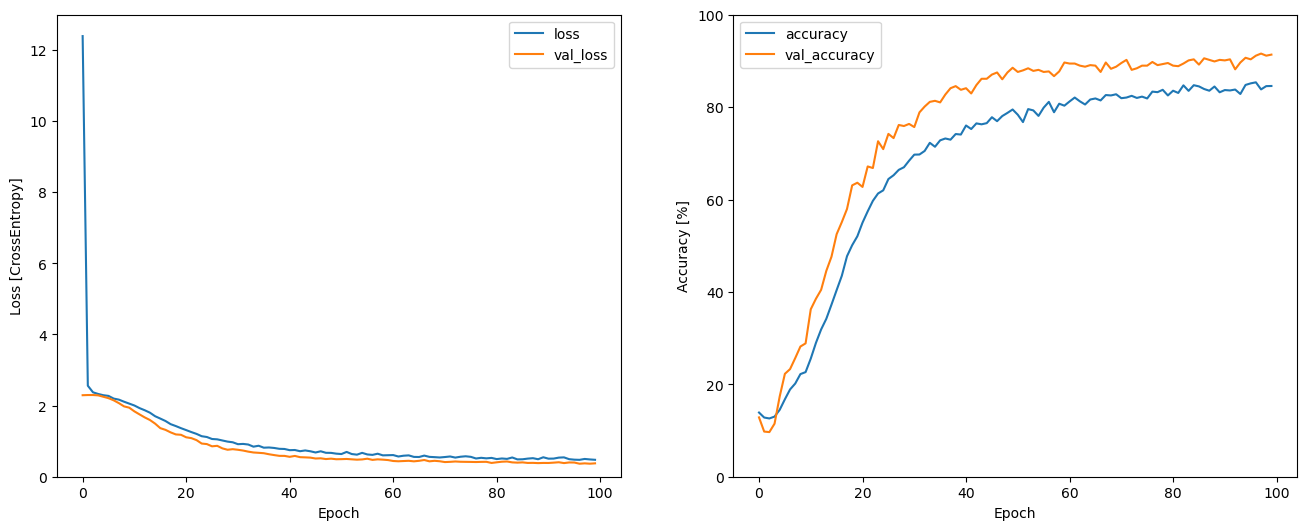

In [138]:
metrics = history.history
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')

plt.subplot(1,2,2)
plt.plot(history.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim([0, 100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')


In [142]:
model

In [143]:
test_accuracy=model.evaluate(X_test,Y_test,verbose=0)
print(test_accuracy[1])

0.9136363863945007


In [144]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [145]:
filename="Guira_Cuckoo001.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)

# Reshape to 1D array
predicted_label_1d = np.argmax(predicted_label, axis=1)

prediction_class=labelencoder.inverse_transform(predicted_label_1d)
prediction_class

[-319.94962     65.4234      -2.0694883   40.764893   -11.359847
   32.612385   -13.771595    17.644558   -13.044228    22.32312
  -13.078986    10.763883    -8.080789    15.728896   -16.036865
   11.619553    -7.387176     5.0774884   -1.0550797   -1.0346915
   -3.547365     7.337772    -6.869826     4.3230505   -5.8369074
    5.2668905   -3.5338407    0.6474463   -3.7500844    1.8137698
    0.679785    -5.033357     2.114961    -0.5094632   -1.1585351
    0.9062575   -2.783628     0.7647029    0.6159818   -3.0733225]
[[-319.94962     65.4234      -2.0694883   40.764893   -11.359847
    32.612385   -13.771595    17.644558   -13.044228    22.32312
   -13.078986    10.763883    -8.080789    15.728896   -16.036865
    11.619553    -7.387176     5.0774884   -1.0550797   -1.0346915
    -3.547365     7.337772    -6.869826     4.3230505   -5.8369074
     5.2668905   -3.5338407    0.6474463   -3.7500844    1.8137698
     0.679785    -5.033357     2.114961    -0.5094632   -1.1585351
     0.906

array(['Greater_Coucal'], dtype='<U20')

In [146]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

28/28 [==============================] - 0s 1ms/step


In [147]:
predicted_labels

array([8, 4, 3, 9, 2, 9, 6, 6, 8, 9, 8, 6, 2, 6, 8, 3, 3, 3, 4, 3, 7, 1,
       7, 3, 9, 2, 0, 8, 7, 0, 0, 8, 5, 3, 6, 0, 8, 6, 9, 9, 3, 8, 8, 9,
       1, 9, 9, 1, 2, 0, 1, 1, 3, 4, 3, 5, 3, 9, 6, 4, 4, 6, 8, 0, 8, 2,
       2, 3, 3, 4, 7, 4, 8, 9, 2, 7, 0, 4, 3, 2, 1, 3, 4, 5, 3, 1, 3, 8,
       2, 2, 7, 6, 6, 0, 2, 8, 1, 7, 1, 4, 8, 1, 6, 7, 8, 2, 5, 3, 9, 7,
       0, 6, 7, 8, 7, 3, 6, 5, 2, 4, 6, 9, 8, 8, 3, 6, 0, 2, 3, 5, 8, 5,
       3, 9, 3, 0, 6, 5, 0, 3, 3, 0, 6, 2, 3, 0, 7, 6, 0, 7, 1, 5, 8, 3,
       3, 5, 1, 1, 4, 8, 9, 3, 3, 9, 0, 1, 0, 7, 3, 7, 9, 4, 7, 1, 0, 5,
       1, 4, 0, 5, 3, 5, 5, 5, 8, 7, 1, 3, 6, 0, 9, 7, 9, 9, 4, 6, 2, 7,
       3, 6, 3, 8, 5, 4, 2, 3, 0, 8, 0, 0, 0, 5, 7, 3, 9, 4, 3, 5, 4, 6,
       8, 3, 5, 0, 5, 8, 5, 0, 3, 5, 3, 9, 7, 6, 8, 1, 9, 3, 3, 1, 0, 7,
       6, 2, 9, 4, 5, 8, 6, 8, 4, 4, 8, 6, 2, 9, 2, 4, 2, 9, 4, 3, 6, 4,
       9, 1, 7, 7, 7, 5, 0, 8, 2, 8, 6, 3, 6, 8, 3, 8, 7, 8, 1, 5, 1, 3,
       4, 1, 3, 3, 5, 5, 2, 4, 5, 6, 2, 5, 0, 6, 1,

In [148]:
predicted_class=labelencoder.inverse_transform(predicted_labels)
predicted_class

array(['Pheasant_Cuckoo', 'Greater_Coucal', 'Great_Spotted_Cuckoo',
       'Striped_Cuckoo', 'Common Cuckoo', 'Striped_Cuckoo',
       'Indian_Cuckoo', 'Indian_Cuckoo', 'Pheasant_Cuckoo',
       'Striped_Cuckoo', 'Pheasant_Cuckoo', 'Indian_Cuckoo',
       'Common Cuckoo', 'Indian_Cuckoo', 'Pheasant_Cuckoo',
       'Great_Spotted_Cuckoo', 'Great_Spotted_Cuckoo',
       'Great_Spotted_Cuckoo', 'Greater_Coucal', 'Great_Spotted_Cuckoo',
       'Pacific_Koel', 'Black_Cuckoo', 'Pacific_Koel',
       'Great_Spotted_Cuckoo', 'Striped_Cuckoo', 'Common Cuckoo',
       'Asian_Koel', 'Pheasant_Cuckoo', 'Pacific_Koel', 'Asian_Koel',
       'Asian_Koel', 'Pheasant_Cuckoo', 'Guira_Cuckoo',
       'Great_Spotted_Cuckoo', 'Indian_Cuckoo', 'Asian_Koel',
       'Pheasant_Cuckoo', 'Indian_Cuckoo', 'Striped_Cuckoo',
       'Striped_Cuckoo', 'Great_Spotted_Cuckoo', 'Pheasant_Cuckoo',
       'Pheasant_Cuckoo', 'Striped_Cuckoo', 'Black_Cuckoo',
       'Striped_Cuckoo', 'Striped_Cuckoo', 'Black_Cuckoo',
      

In [149]:
Y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [150]:
actual_labels = np.argmax(Y_test, axis=1)
actual_labels

array([8, 4, 3, 5, 2, 9, 6, 6, 8, 9, 8, 6, 2, 1, 8, 1, 3, 3, 4, 1, 7, 1,
       7, 3, 9, 2, 1, 8, 7, 0, 0, 8, 5, 3, 6, 0, 8, 6, 9, 9, 3, 8, 8, 9,
       1, 9, 9, 1, 2, 0, 1, 1, 1, 4, 3, 5, 0, 9, 6, 4, 4, 6, 8, 0, 8, 3,
       2, 3, 3, 4, 7, 4, 8, 9, 2, 7, 0, 4, 3, 2, 1, 3, 2, 5, 3, 1, 3, 8,
       2, 2, 7, 6, 6, 0, 2, 8, 1, 7, 1, 4, 8, 1, 6, 7, 8, 2, 5, 5, 9, 7,
       0, 6, 7, 8, 7, 1, 6, 1, 2, 4, 6, 9, 8, 8, 2, 6, 0, 2, 4, 5, 8, 5,
       3, 9, 3, 0, 6, 5, 0, 9, 3, 0, 0, 2, 3, 5, 7, 6, 0, 7, 1, 5, 8, 3,
       3, 5, 1, 1, 4, 8, 9, 3, 3, 9, 0, 1, 0, 7, 9, 7, 9, 4, 7, 1, 0, 5,
       1, 4, 0, 5, 3, 5, 5, 5, 8, 7, 1, 3, 6, 0, 9, 7, 9, 9, 4, 6, 2, 7,
       3, 6, 3, 8, 5, 4, 2, 2, 0, 8, 0, 1, 3, 5, 7, 4, 9, 4, 3, 5, 4, 6,
       8, 3, 5, 0, 5, 8, 5, 0, 3, 5, 3, 9, 7, 6, 8, 1, 9, 1, 3, 3, 1, 7,
       6, 2, 9, 4, 5, 8, 6, 8, 5, 4, 8, 6, 2, 9, 2, 4, 2, 9, 4, 4, 6, 4,
       9, 1, 7, 7, 7, 5, 0, 8, 2, 8, 6, 3, 6, 8, 3, 8, 7, 8, 1, 5, 1, 3,
       4, 1, 3, 3, 5, 3, 2, 4, 5, 6, 2, 5, 0, 6, 1,

In [151]:
actual_class=labelencoder.inverse_transform(actual_labels)
actual_class

array(['Pheasant_Cuckoo', 'Greater_Coucal', 'Great_Spotted_Cuckoo',
       'Guira_Cuckoo', 'Common Cuckoo', 'Striped_Cuckoo', 'Indian_Cuckoo',
       'Indian_Cuckoo', 'Pheasant_Cuckoo', 'Striped_Cuckoo',
       'Pheasant_Cuckoo', 'Indian_Cuckoo', 'Common Cuckoo',
       'Black_Cuckoo', 'Pheasant_Cuckoo', 'Black_Cuckoo',
       'Great_Spotted_Cuckoo', 'Great_Spotted_Cuckoo', 'Greater_Coucal',
       'Black_Cuckoo', 'Pacific_Koel', 'Black_Cuckoo', 'Pacific_Koel',
       'Great_Spotted_Cuckoo', 'Striped_Cuckoo', 'Common Cuckoo',
       'Black_Cuckoo', 'Pheasant_Cuckoo', 'Pacific_Koel', 'Asian_Koel',
       'Asian_Koel', 'Pheasant_Cuckoo', 'Guira_Cuckoo',
       'Great_Spotted_Cuckoo', 'Indian_Cuckoo', 'Asian_Koel',
       'Pheasant_Cuckoo', 'Indian_Cuckoo', 'Striped_Cuckoo',
       'Striped_Cuckoo', 'Great_Spotted_Cuckoo', 'Pheasant_Cuckoo',
       'Pheasant_Cuckoo', 'Striped_Cuckoo', 'Black_Cuckoo',
       'Striped_Cuckoo', 'Striped_Cuckoo', 'Black_Cuckoo',
       'Common Cuckoo', 'Asian

In [152]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(actual_class,predicted_class)
print(cm)

[[69  0  0  4  0  1  2  0  0  1]
 [ 6 83  0 10  0  2  1  0  0  0]
 [ 0  0 75  3  3  0  0  0  0  0]
 [ 1  1  2 92  0  1  0  1  1  0]
 [ 1  0  0  7 83  0  0  0  1  1]
 [ 2  0  0  4  2 74  0  0  0  1]
 [ 1  0  0  1  0  0 79  0  2  0]
 [ 0  0  0  1  0  0  1 76  0  0]
 [ 0  0  0  1  0  4  1  0 97  0]
 [ 0  2  0  2  0  0  0  0  1 76]]


In [153]:
print(classification_report(predicted_class,actual_class))

                      precision    recall  f1-score   support

          Asian_Koel       0.90      0.86      0.88        80
        Black_Cuckoo       0.81      0.97      0.88        86
       Common Cuckoo       0.93      0.97      0.95        77
Great_Spotted_Cuckoo       0.93      0.74      0.82       125
      Greater_Coucal       0.89      0.94      0.92        88
        Guira_Cuckoo       0.89      0.90      0.90        82
       Indian_Cuckoo       0.95      0.94      0.95        84
        Pacific_Koel       0.97      0.99      0.98        77
     Pheasant_Cuckoo       0.94      0.95      0.95       102
      Striped_Cuckoo       0.94      0.96      0.95        79

            accuracy                           0.91       880
           macro avg       0.92      0.92      0.92       880
        weighted avg       0.92      0.91      0.91       880



In [154]:
data_dir = 'Cuckoo'
classes = np.array(tf.io.gfile.listdir(str(data_dir)))
print('Species:', classes)

Species: ['Asian_Koel' 'Black_Cuckoo' 'Common_Cuckoo' 'Greater_Coucal'
 'Great_Spotted_Cuckoo' 'Guira_Cuckoo' 'Indian_Cuckoo' 'Pacific_Koel'
 'Pheasant_Cuckoo' 'Striped_Cuckoo']


In [155]:
print(classes)

['Asian_Koel' 'Black_Cuckoo' 'Common_Cuckoo' 'Greater_Coucal'
 'Great_Spotted_Cuckoo' 'Guira_Cuckoo' 'Indian_Cuckoo' 'Pacific_Koel'
 'Pheasant_Cuckoo' 'Striped_Cuckoo']


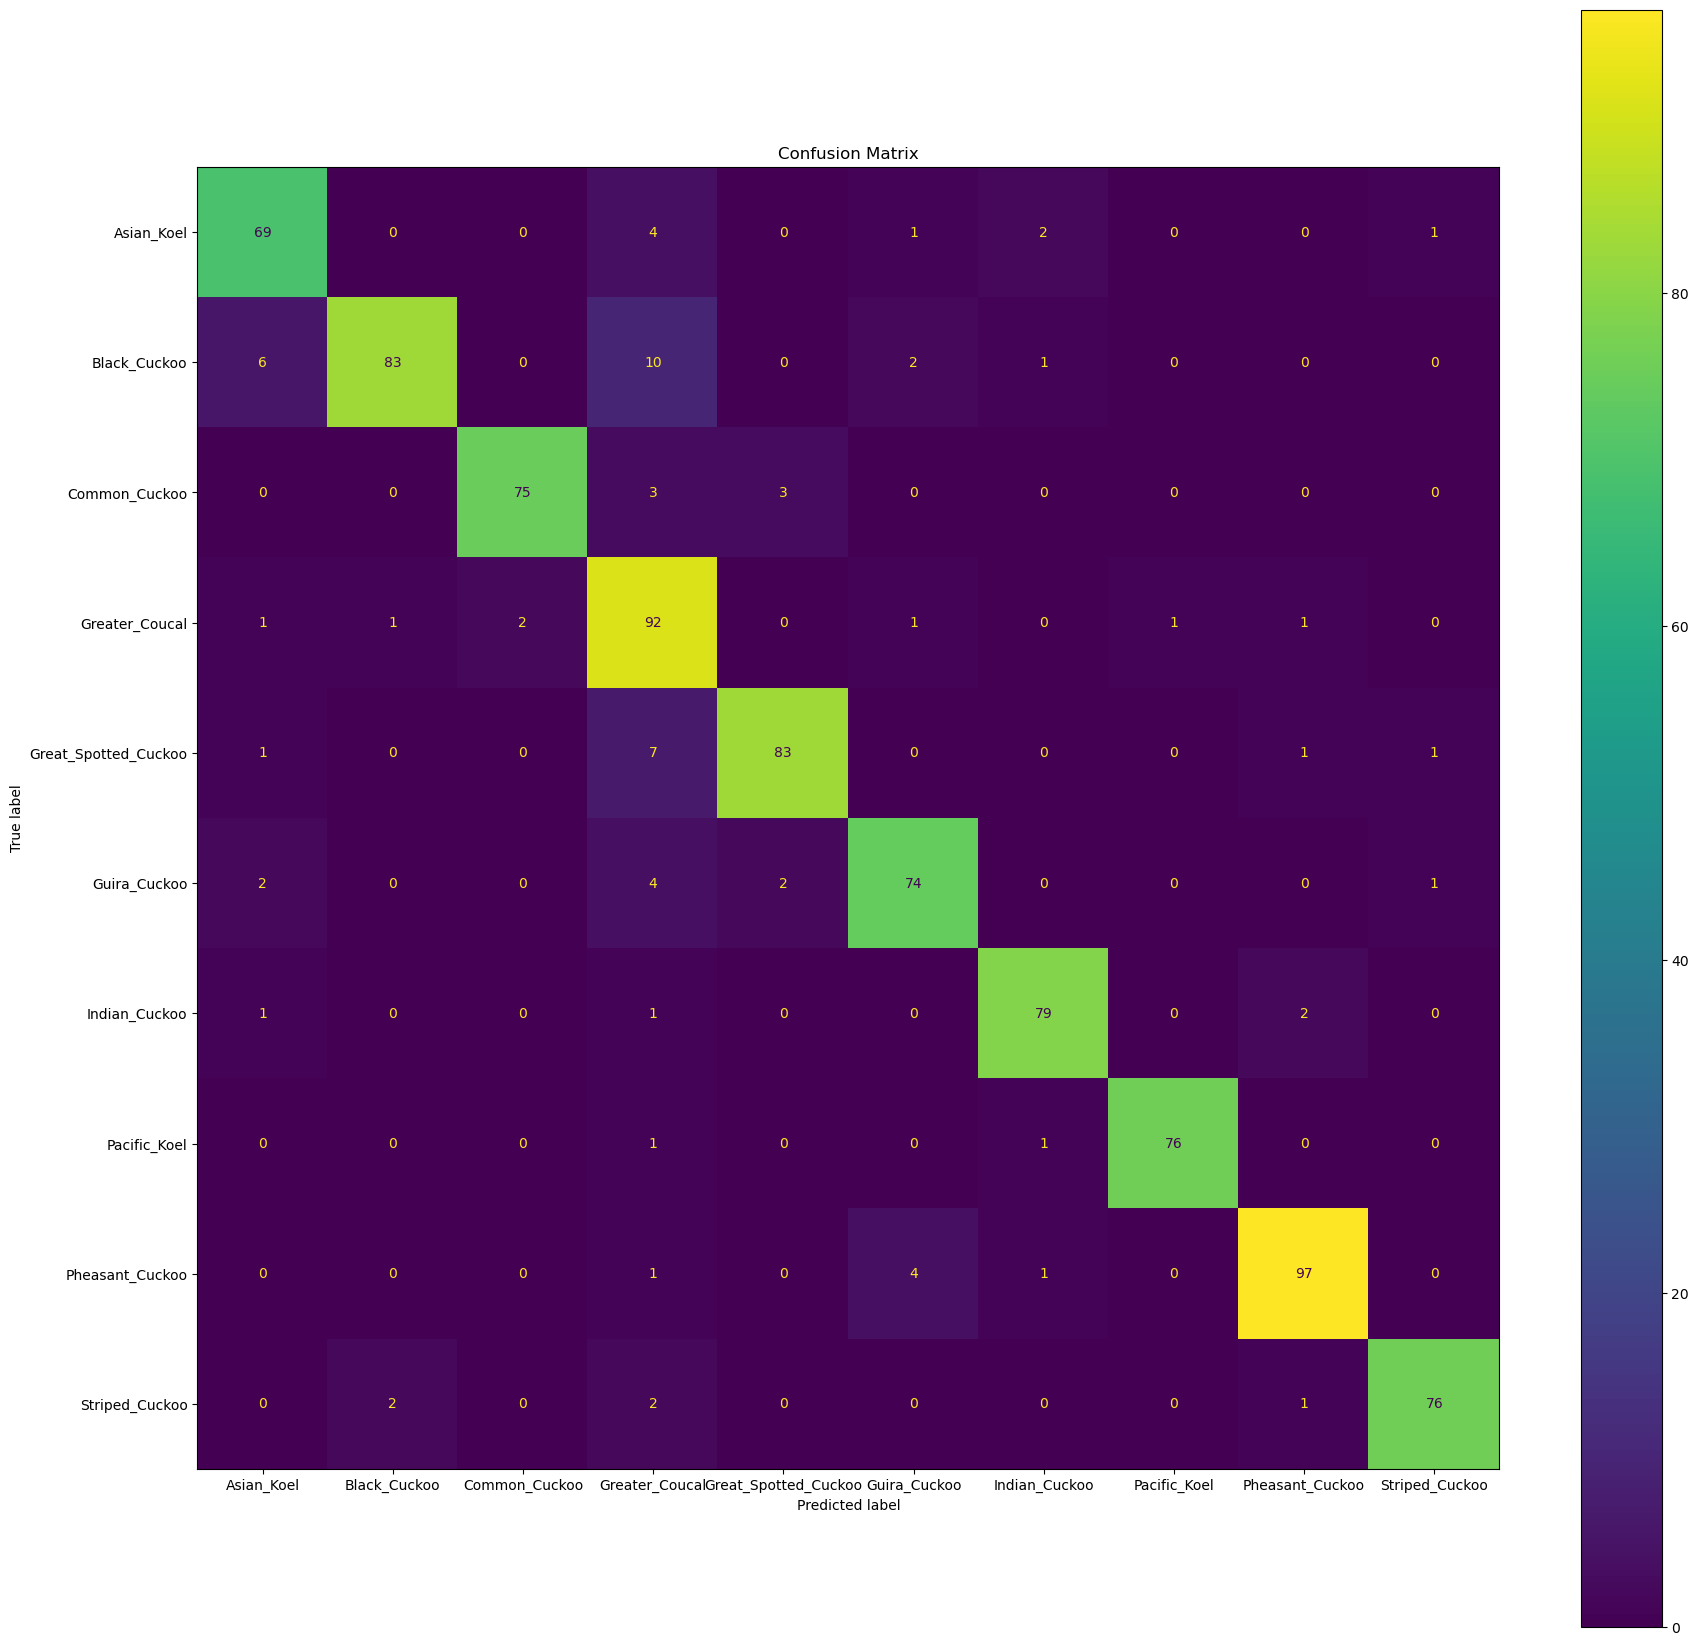

In [156]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(21,21), dpi=100)
display = ConfusionMatrixDisplay(cm, display_labels=classes)
ax.set(title='Confusion Matrix')
display.plot(ax=ax);